In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import swe2hs as jopack

In [211]:
df= pd.read_csv('manual_stations_validation_data.csv')
df.head()

,date,HS_[m],SWE_[m],SWE_from_profile_[m],site_id
0,1991-10-18,0.00,0.000000,NaN,1AD
1,1991-10-19,0.13,0.009007,NaN,1AD
2,1991-10-20,0.06,0.009007,NaN,1AD
3,1991-10-21,0.02,0.007656,NaN,1AD
4,1991-10-22,0.00,0.000000,NaN,1AD


In [212]:
df = df[['SWE_[m]','HS_[m]','date','site_id']].rename(columns={'SWE_[m]': 'swe','HS_[m]':'hsm','date':'date','site_id':'site_id'})

In [213]:
# Ensure date is datetime
# df['date'] = pd.to_datetime(df['date'])

# 1. Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
# 2. Set date as index
df = df.set_index('date')
# 3. Keep only SWE column (rename to 'swe' if you want)
# df_ts = df_ts[['SWE_[m]','HS_[m]']].rename(columns={'SWE_[m]': 'swe','HS_[m]':'actual_hs'})
df

,swe,hsm,site_id
date,,,
1991-10-18,0.000000,0.00,1AD
1991-10-19,0.009007,0.13,1AD
1991-10-20,0.009007,0.06,1AD
1991-10-21,0.007656,0.02,1AD
1991-10-22,0.000000,0.00,1AD
...,...,...,...
2020-04-02,0.023492,0.07,7ZU
2020-04-03,0.000000,0.00,7ZU
2020-04-30,0.000000,0.00,7ZU


In [214]:
# Get unique site names (should be 44)
sites = df['site_id'].unique()
sites


array(['1AD', '1GD', '1GS', '1GT', '1LS', '1MI', '1MR', '2AN', '2RI',
       '2ST', '2TR', '3BR', '3EL', '3FB', '3MB', '3SW', '4BP', '4FY',
       '4KU', '4MS', '4SF', '4UL', '4WI', '4ZE', '5AR', '5BI', '5DF',
       '5DI', '5JU', '5KK', '5RU', '5SE', '5SP', '5ZV', '6NT', '6RO',
       '6SB', '7CO', '7LD', '7MA', '7MT', '7SN', '7ST', '7ZU'],
      dtype=object)

In [215]:
site_data = {}
for site in sites:
    site_data[site] = df[df['site_id'] == site].sort_index()
site_data.items()

dict_items([('1AD',                  swe   hsm site_id
date                              
1991-10-18  0.000000  0.00     1AD
1991-10-19  0.009007  0.13     1AD
1991-10-20  0.009007  0.06     1AD
1991-10-21  0.007656  0.02     1AD
1991-10-22  0.000000  0.00     1AD
...              ...   ...     ...
2018-03-31  0.007621  0.11     1AD
2018-04-01  0.015480  0.21     1AD
2018-04-02  0.015480  0.09     1AD
2018-04-03  0.007656  0.02     1AD
2018-04-04  0.000000  0.00     1AD

[1358 rows x 3 columns]), ('1GD',                  swe   hsm site_id
date                              
1991-10-18  0.000000  0.00     1GD
1991-10-19  0.005229  0.08     1GD
1991-10-20  0.011592  0.17     1GD
1991-10-21  0.011592  0.12     1GD
1991-10-22  0.011592  0.09     1GD
...              ...   ...     ...
2019-06-03  0.243230  0.55     1GD
2019-06-04  0.185739  0.42     1GD
2019-06-05  0.132671  0.30     1GD
2019-06-06  0.088447  0.20     1GD
2019-06-07  0.044224  0.10     1GD

[2647 rows x 3 columns]), ('1GS', 

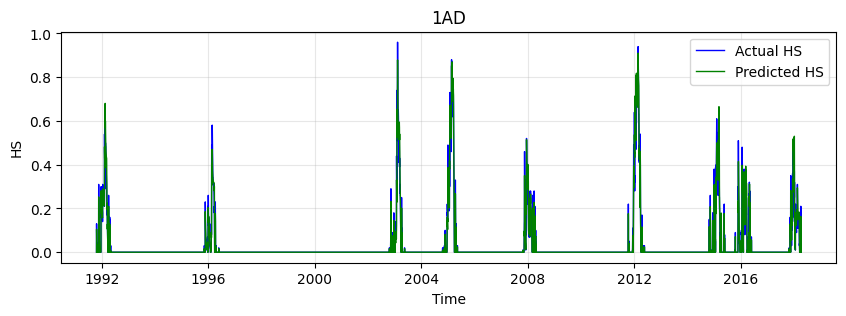

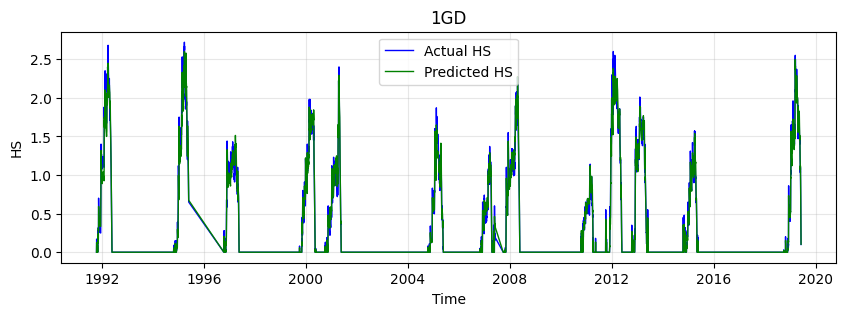

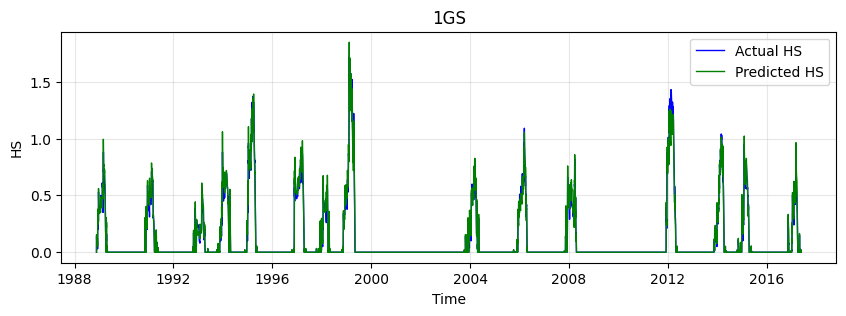

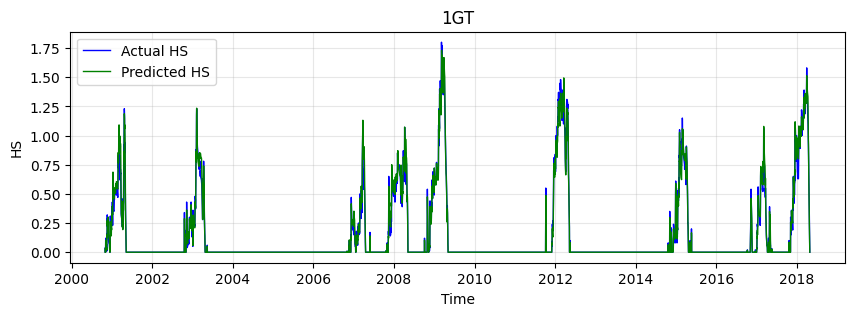

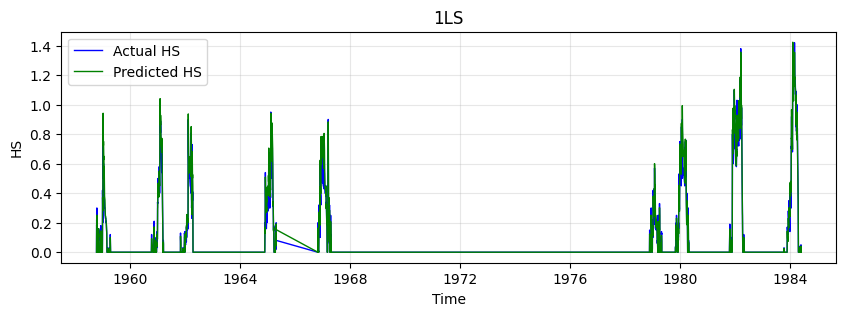

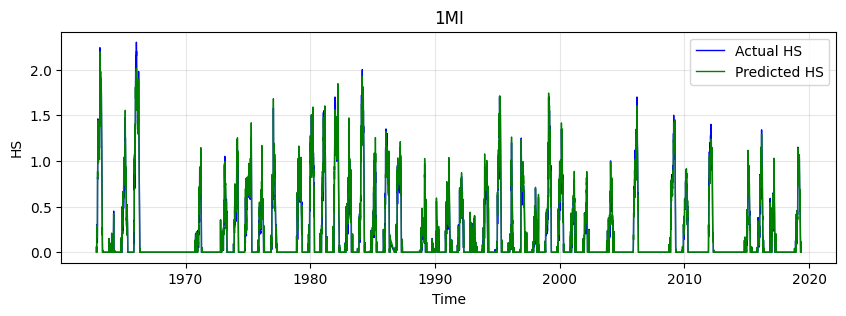

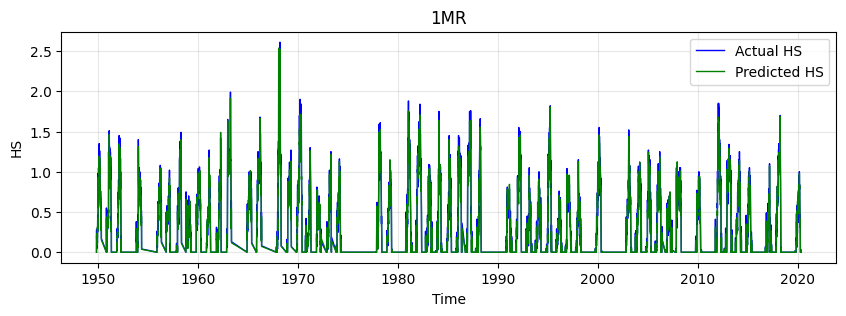

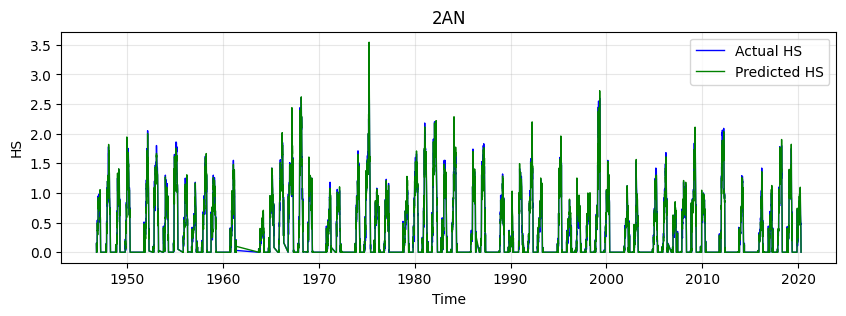

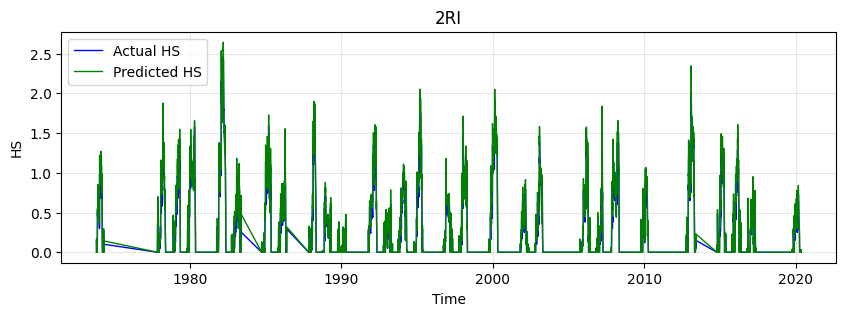

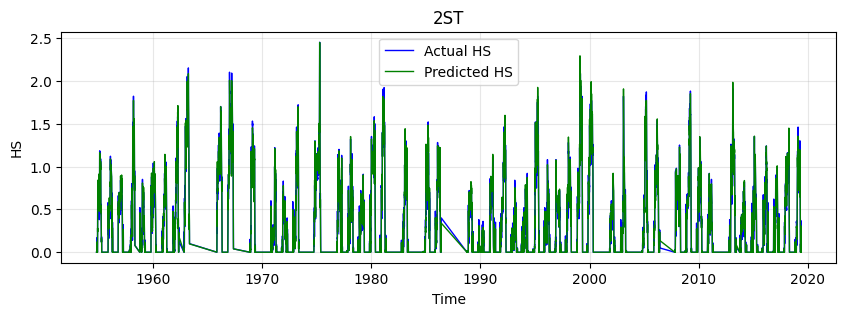

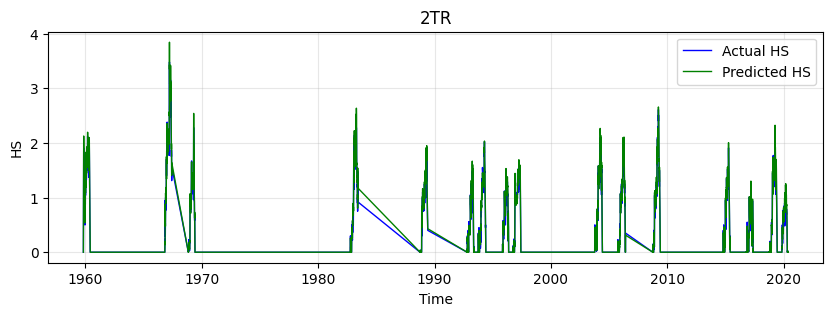

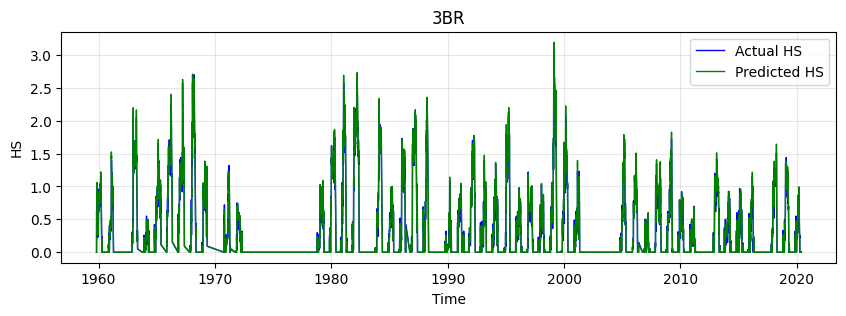

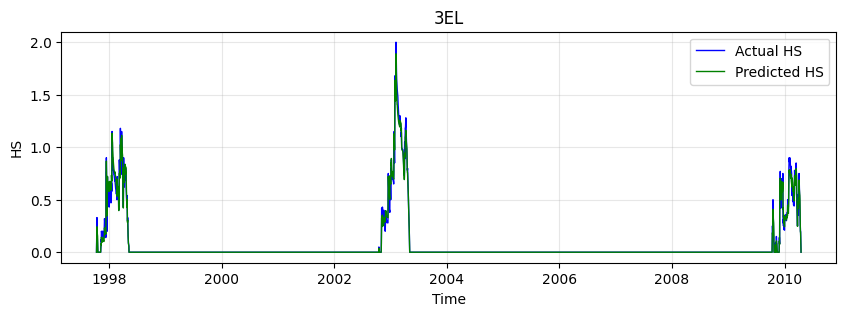

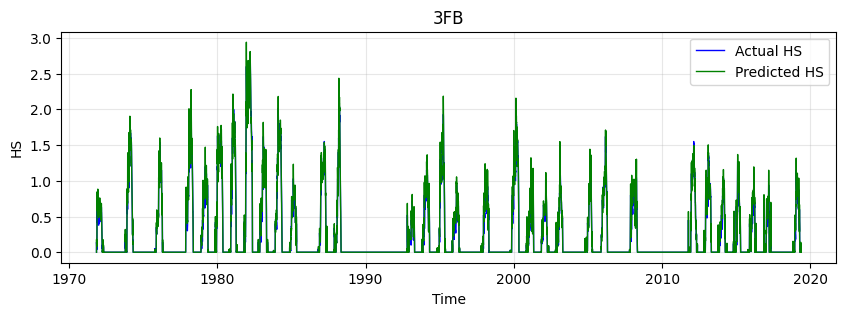

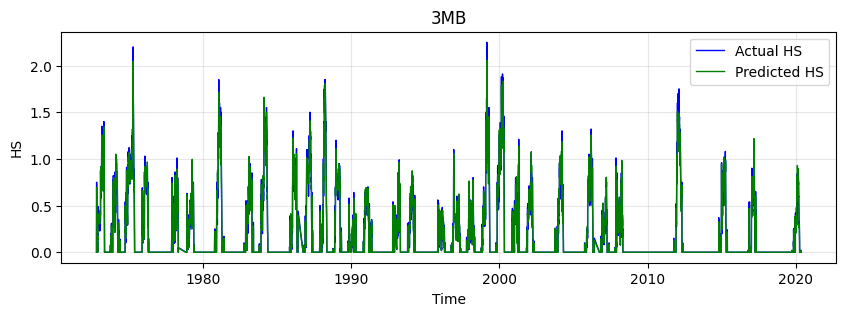

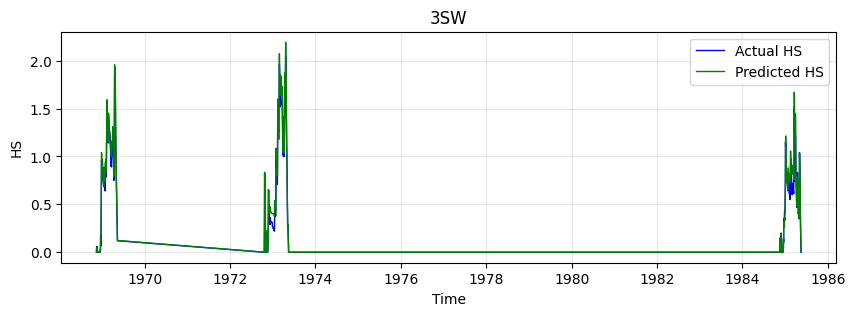

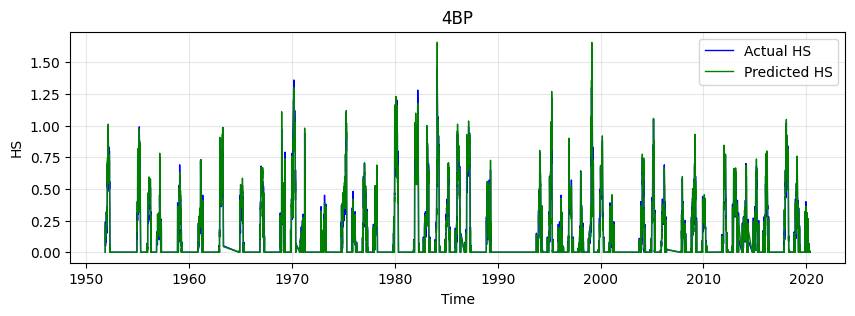

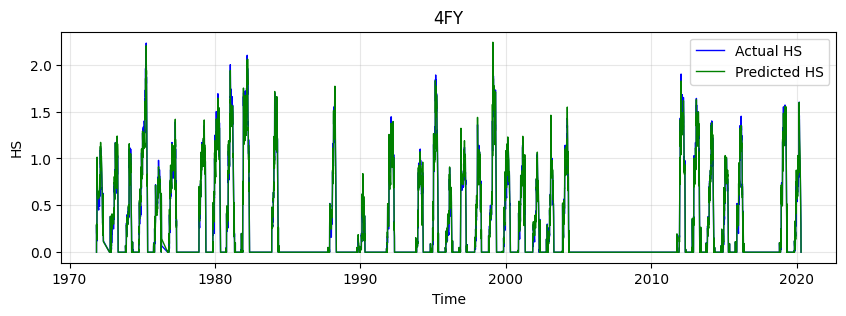

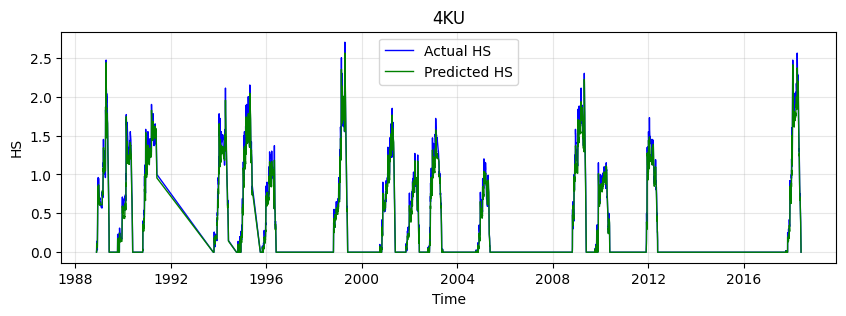

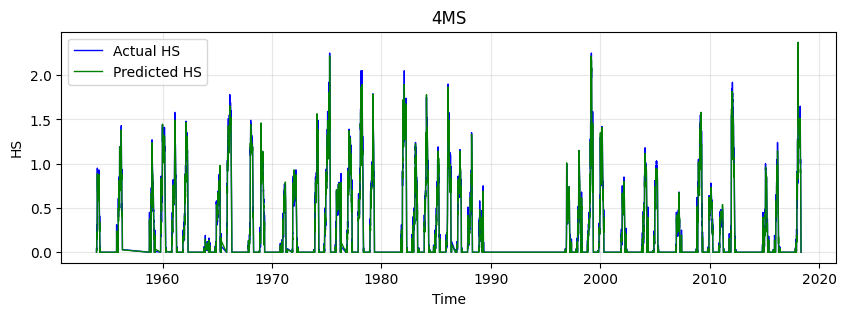

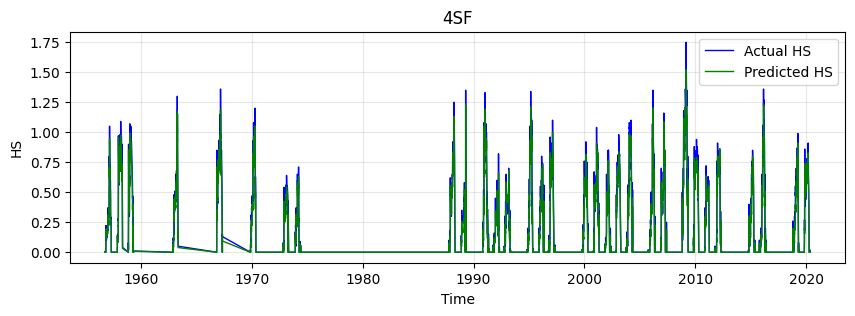

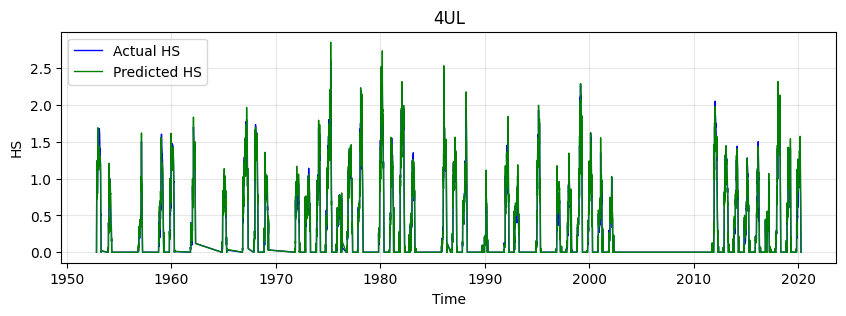

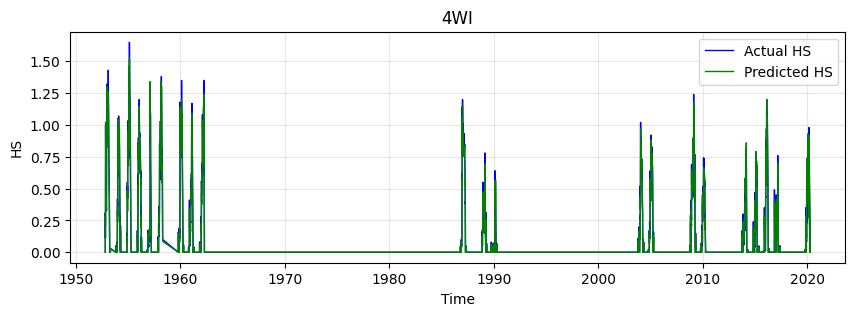

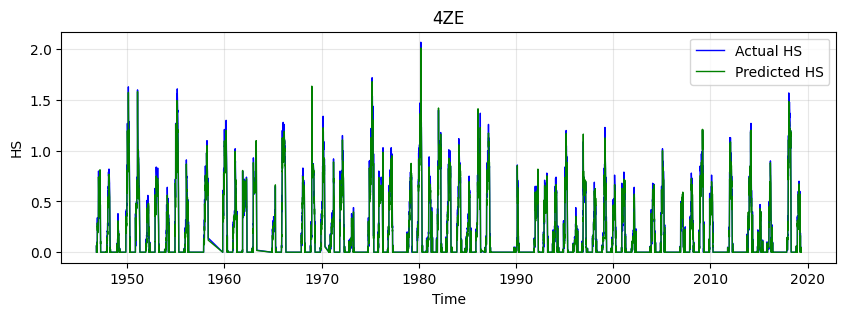

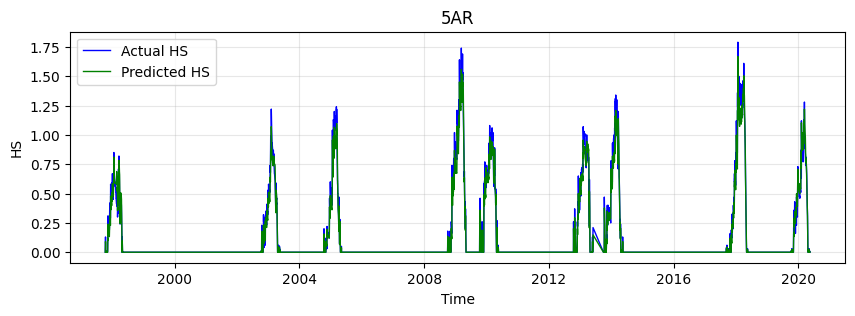

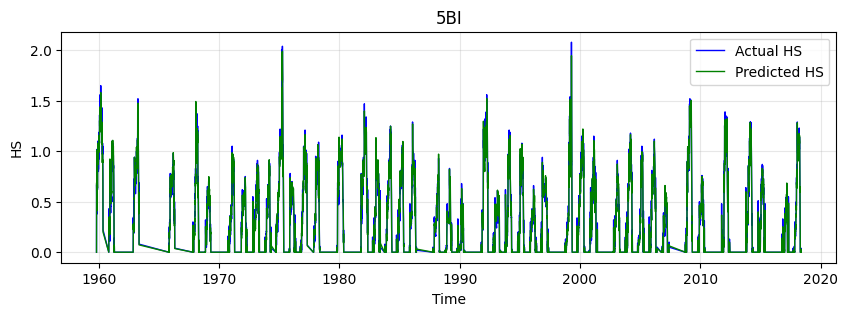

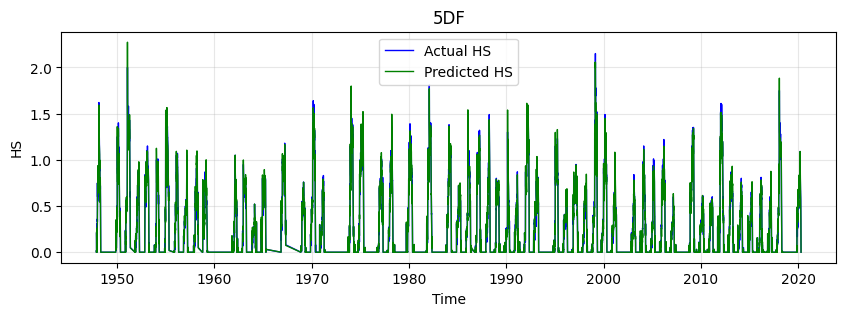

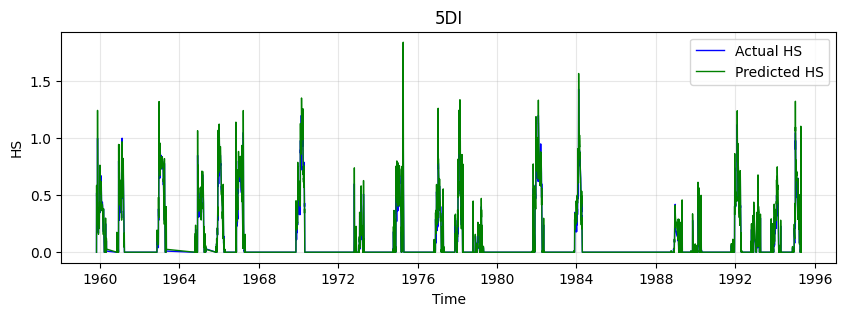

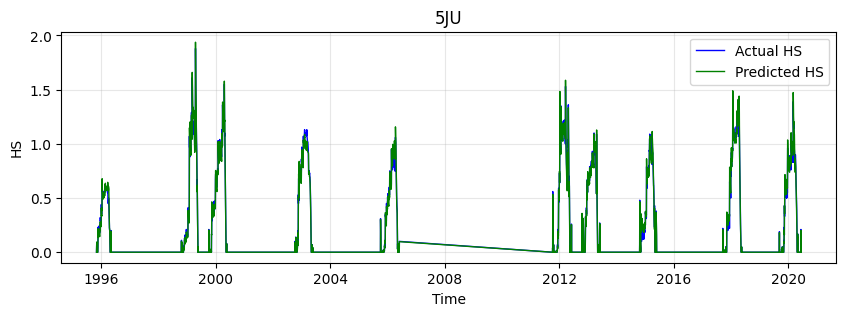

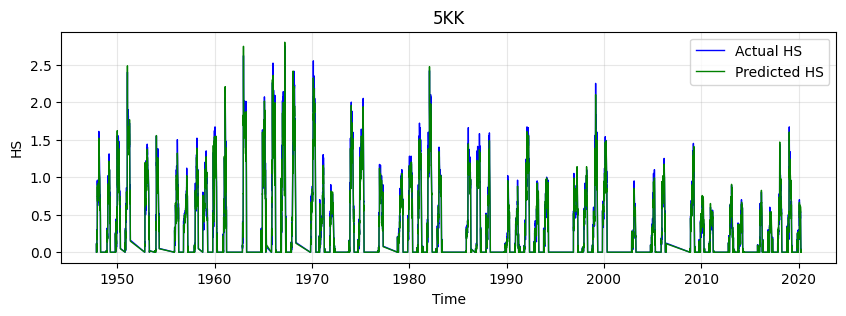

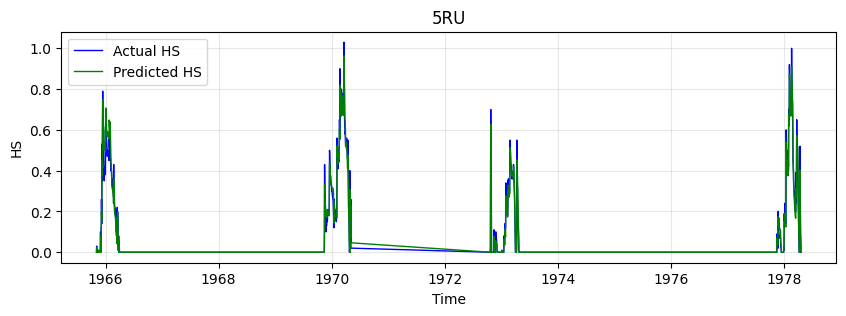

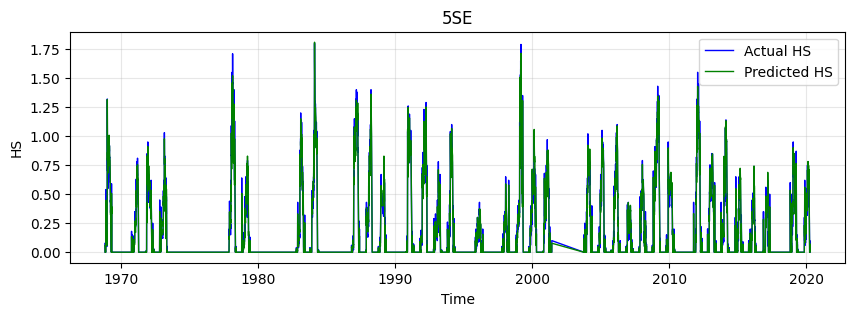

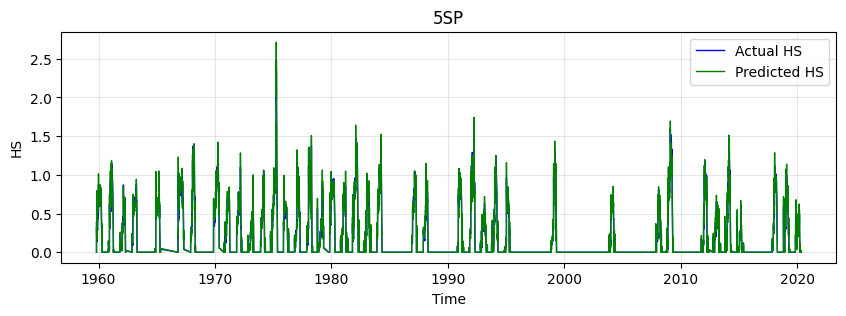

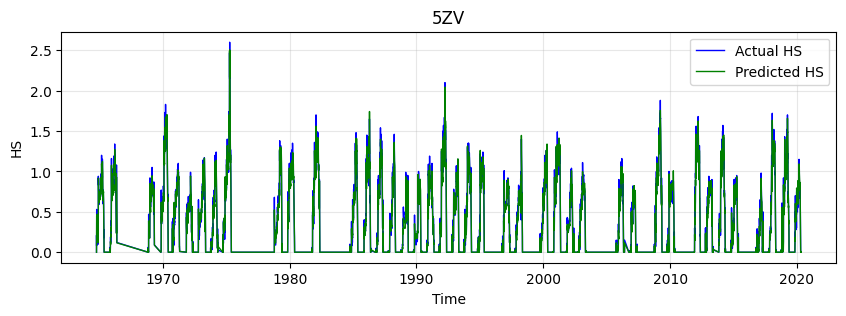

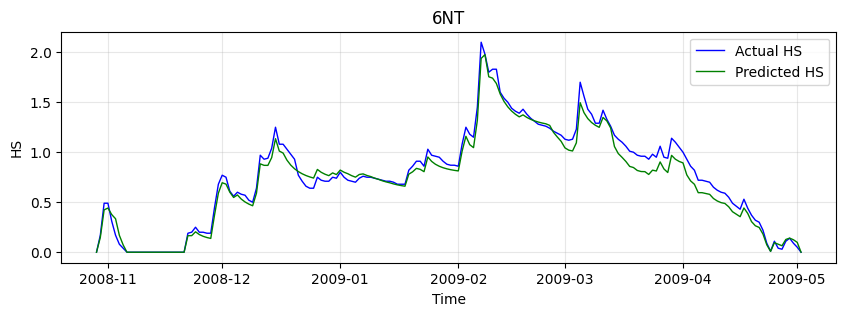

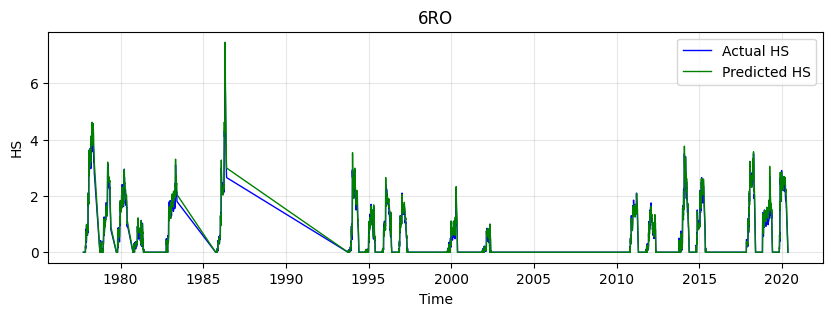

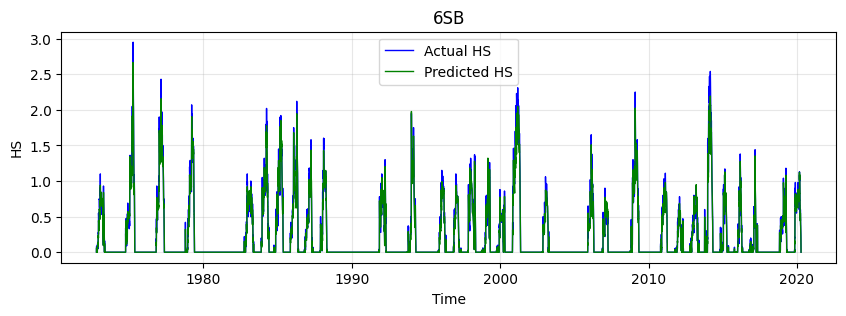

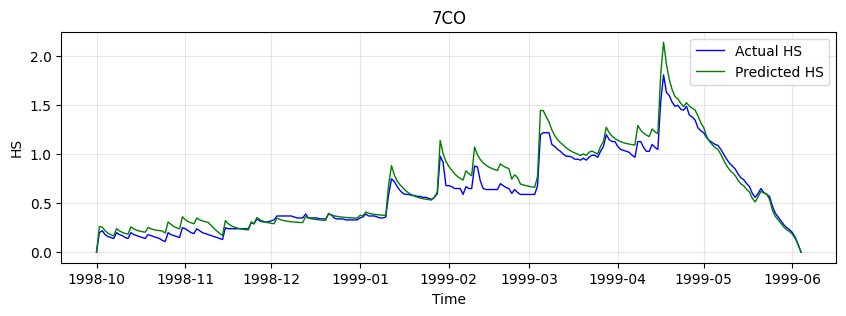

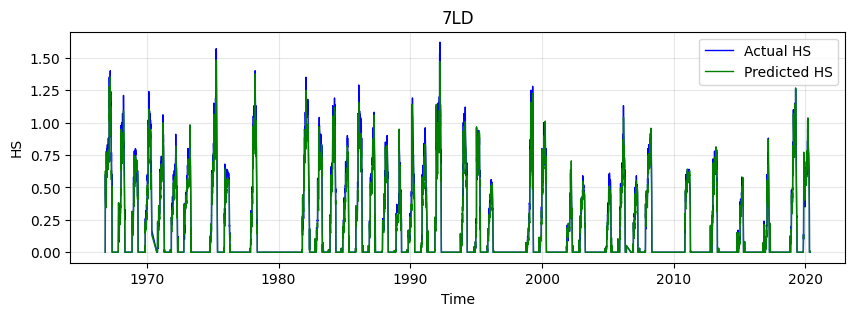

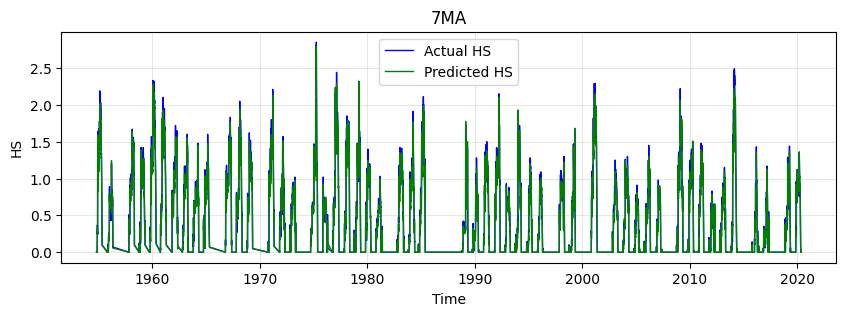

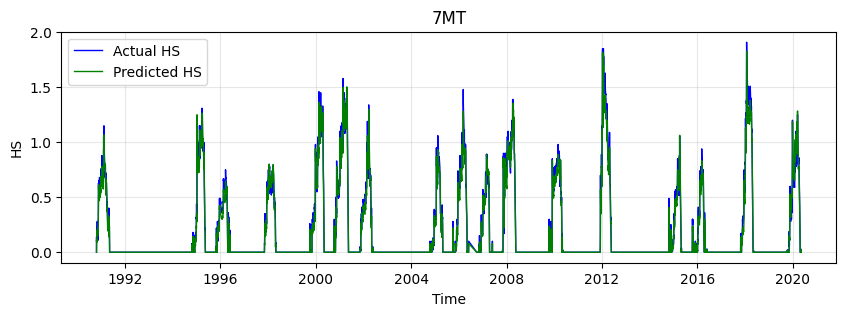

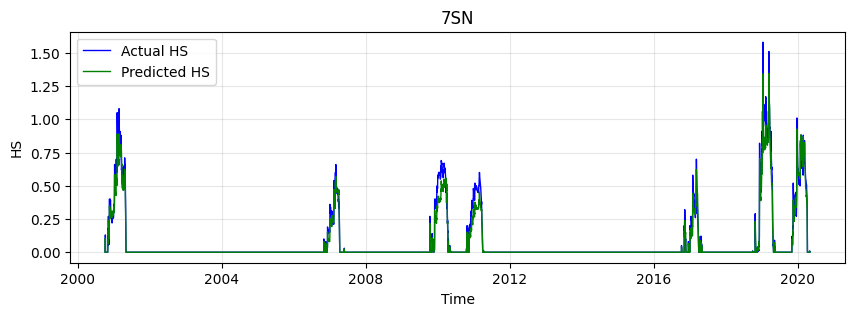

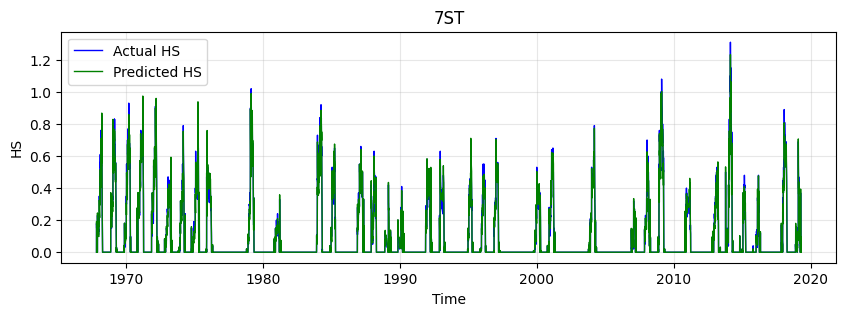

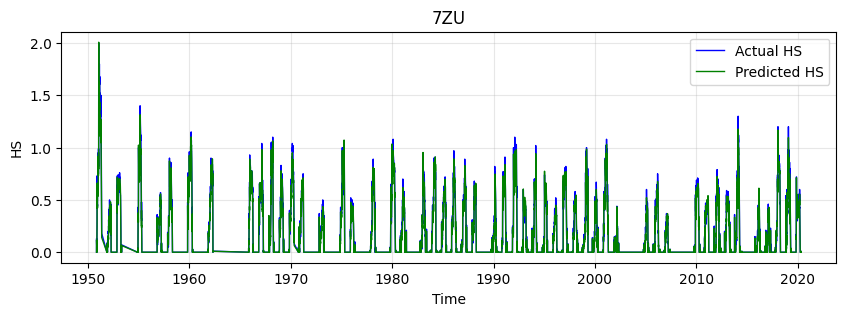

'7ZU'

In [235]:
hs_pred_all = {}   # site_id → predicted HS series
r2_all = {}        # site_id → R² value

for site_id, site_df in site_data.items():

    # Time index
    time = site_df.index
    # SWE → HS
    hs_pred = jopack.convert_1d(
        site_df['swe'],
        swe_input_unit='m',
        hs_output_unit='m'
    )

    hs_actual = site_df['hsm']

    # Store predictions
    hs_pred_all[site_id] = hs_pred

    # R²
    r2_all[site_id] = r2_score(hs_actual, hs_pred)
    
# # 3️⃣ Predicted only
#     fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True)
#    # 1️⃣ Actual vs Predicted
#     axes[0].plot(time, hs_actual, label='Actual HS', color='blue', linewidth=1)
#     axes[0].plot(time, hs_pred, label='Predicted HS', color='green', linewidth=1)
#     axes[0].set_title(site_id)
#     axes[0].set_ylabel('HS')
#     axes[0].legend()
#     axes[0].grid(True, alpha=0.3)

    plt.figure(figsize=(10, 3))  # Set the figure size

    plt.plot(time, hs_actual, label='Actual HS', color='blue', linewidth=1)
    plt.plot(time, hs_pred, label='Predicted HS', color='green', linewidth=1)

    plt.title(site_id)       # Set title
    plt.xlabel('Time')       # X-axis label
    plt.ylabel('HS')         # Y-axis label
    plt.legend()             # Show legend
    plt.grid(True, alpha=0.3)  # Optional: grid

    plt.show()


site_id

In [217]:
r2_df = pd.DataFrame.from_dict(
    r2_all,
    orient='index',
    columns=['R2']
).reset_index()

r2_df.rename(columns={'index': 'site_id'}, inplace=True)

print(r2_df.shape)   # (44, 2)
print(r2_df.head())
r2_df.to_csv("r2__df.csv", index=False)




(44, 2)
  site_id        R2
0     1AD  0.948249
1     1GD  0.974803
2     1GS  0.963426
3     1GT  0.970897
4     1LS  0.947441


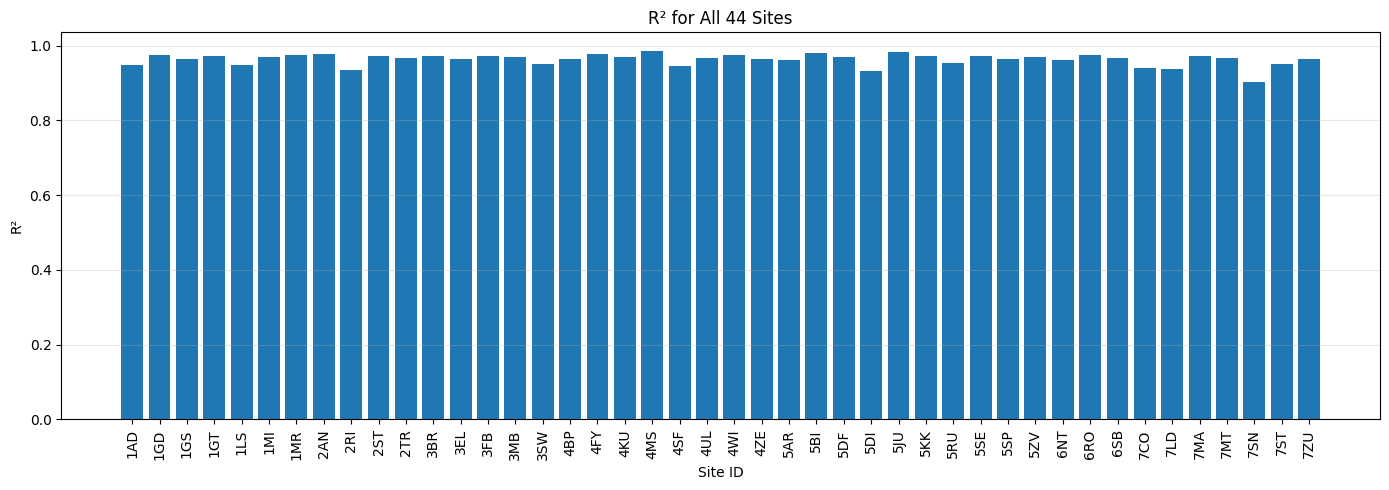

In [218]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.bar(r2_df['site_id'], r2_df['R2'])
plt.xlabel('Site ID')
plt.ylabel('R²')
plt.title('R² for All 44 Sites')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [236]:
r2_df

,site_id,R2
0,1AD,0.948249
1,1GD,0.974803
2,1GS,0.963426
3,1GT,0.970897
4,1LS,0.947441
5,1MI,0.968905
6,1MR,0.975466
7,2AN,0.976402
8,2RI,0.935911
9,2ST,0.972342


In [ ]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Load the data with the month_period column
df = pd.read_csv('updated_manual_stations_data_months.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# Renaming for consistency with your existing code
df = df.rename(columns={'SWE_[m]': 'swe', 'HS_[m]': 'hsm'})

sites = df['site_id'].unique()

# Dictionaries to store results
r2_snow_all = {}    # Period 1 (Oct-Jan)
r2_nosnow_all = {}  # Period 2 (Feb-Sep)
results_list = []

for site_id in sites:
    site_df = df[df['site_id'] == site_id].sort_index()
    
    # --- Step 1: Generate Predictions for the whole site series ---
    # We do this on the whole series to maintain model state continuity
    hs_pred = jopack.convert_1d(
        site_df['swe'],
        swe_input_unit='m',
        hs_output_unit='m'
    )
    site_df['hs_pred'] = hs_pred

    # --- Step 2: Calculate R2 for each period ---
    
    # Snow Period (month_period == 1)
    snow_mask = (site_df['month_period'] == 1)
    snow_df = site_df[snow_mask].dropna(subset=['hsm', 'hs_pred'])
    if len(snow_df) > 1:
        r2_snow = r2_score(snow_df['hsm'], snow_df['hs_pred'])
    else:
        r2_snow = np.nan
    
    # No Snow Period (month_period == 2)
    nosnow_mask = (site_df['month_period'] == 2)
    nosnow_df = site_df[nosnow_mask].dropna(subset=['hsm', 'hs_pred'])
    if len(nosnow_df) > 1:
        r2_nosnow = r2_score(nosnow_df['hsm'], nosnow_df['hs_pred'])
    else:
        r2_nosnow = np.nan

    r2_snow_all[site_id] = r2_snow
    r2_nosnow_all[site_id] = r2_nosnow
    
    # --- Step 3: Special Plots for Site 1AD ---
    if site_id == '1AD':
        # Graph 1: During Snow (Period 1)
        plt.figure(figsize=(12, 4))
        plt.plot(snow_df.index, snow_df['hsm'], label='Actual HS', color='blue')
        plt.plot(snow_df.index, snow_df['hs_pred'], label='Predicted HS', color='green', linestyle='--')
        plt.title(f'Site {site_id} - During Snow (Oct-Jan) | R²: {r2_snow:.3f}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        # Graph 2: No Snow (Period 2)
        plt.figure(figsize=(12, 4))
        plt.plot(nosnow_df.index, nosnow_df['hsm'], label='Actual HS', color='blue')
        plt.plot(nosnow_df.index, nosnow_df['hs_pred'], label='Predicted HS', color='orange', linestyle='--')
        plt.title(f'Site {site_id} - No Snow (Feb-Sep) | R²: {r2_nosnow:.3f}')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# --- Step 4: Create a combined R2 DataFrame ---
r2_df = pd.DataFrame({
    'site_id': list(r2_snow_all.keys()),
    'R2_Snow': list(r2_snow_all.values()),
    'R2_No_Snow': list(r2_nosnow_all.values())
})

print(r2_df.head())
r2_df.to_csv("r2_comparison__.csv", index=False)